Rong Wang   1619779944   DSCI552 Project

<b>1. Text Classification</b>

It is highly recommended that you complete this project using Keras1 and Python.

1 https://keras.io

(a) In this problem, we are trying to build a classifier to analyze the sentiment of reviews. You are provided with text data in two folders: one folder involves positive reviews, and one folder involves negative reviews.

<b>(b) Data Exploration and Pre-processing</b>

i. You can use binary encoding for the sentiments , i.e y = 1 for positive senti-
ments and y = −1 for negative sentiments.

ii. The data are pretty clean. Remove the punctuation and numbers from the
data.

iii. The name of each text file starts with cv number. Use text files 0-699 in each class for training and 700-999 for testing.

iv. Count the number of unique words in the whole dataset (train + test) and print it out.

In [128]:
# Reference: 
# https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

import re
import string
from os import listdir
from os.path import isfile, join

unique_words = set()
review_len = []
reviews = []

mypath_pos = "../data/pos/"
mypath_neg = "../data/neg/"
filenames_pos = [join(mypath_pos, f) for f in listdir(mypath_pos) if isfile(join(mypath_pos, f))]
filenames_neg = [join(mypath_neg, f) for f in listdir(mypath_neg) if isfile(join(mypath_neg, f))]
filenames_pos.sort()
filenames_neg.sort()

for filename in filenames_pos+filenames_neg:
    f = open(filename, "r")
    line = f.read()
    # print(line)
    
#     remove_punc = line.translate(str.maketrans('', '', string.punctuation))
    
    remove_punc = re.sub(r'[^\w\s]', '', line)  # remove punctuations
    # print(remove_punc)
    remove_num = re.sub("\d+", " ", remove_punc)  # remove numbers
#     print(remove_num)
    remove_underline = remove_num.replace('_', '')  # remove _
    string_lower = remove_underline.lower()
    
    reviews.append(string_lower)
    
    word_list = string_lower.split()  # argument is omitted, split by whitespace, newlines \n, and tabs \t. Consecutive whitespace is processed together.
#     print(word_list)
    review_len.append(len(word_list))
    unique_words.update(word_list)
print(len(unique_words))
# print(sorted(unique_words))
    

46769


v. Calculate the average review length and the standard deviation of review lengths. Report the results.

In [129]:
# Reference: https://www.geeksforgeeks.org/python-standard-deviation-of-list/

import statistics

print("avg review length: ", statistics.mean(review_len))
print("std review length: ", statistics.pstdev(review_len))

avg review length:  644.407
std review length:  284.99187769303177


vi. Plot the histogram of review lengths.

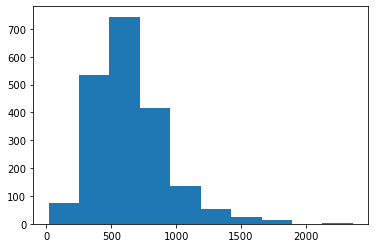

In [130]:
# Reference: https://www.tutorialspoint.com/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data

from matplotlib import pyplot as plt

plt.hist(review_len, 10)
plt.show()

vii. To represent each text (= data point), there are many ways. In NLP/Deep Learning terminology, this task is called tokenization. It is common to rep- resent text using popularity/ rank of words in text. The most common word in the text will be represented as 1, the second most common word will be represented as 2, etc. Tokenize each text document using this method.2

2Keras has an API called Tokenizer. It can yield bag of words, one-hot encoded features, etc.

In [38]:
# pip install tensorflow

     |████████████████████████████████| 217.5 MB 354 kB/s eta 0:00:011    |████████                        | 54.4 MB 444 kB/s eta 0:06:08
     |████████████████████████████████| 1.6 MB 32.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.2 MB/s  eta 0:00:01
     |████████████████████████████████| 5.8 MB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 962 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 6.8 MB/s eta 0:00:011
     |████████████████████████████████| 4.4 MB 7.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 32.6 MB/s eta 0:00:01
     |████████████████████████████████| 156 kB 30.1 MB/s eta 0:00:01
     |████████████████████████████████|

In [148]:
# Reference:
# file Tokenize.webarchive from professor
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

from keras.preprocessing.text import Tokenizer

# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the reviews
t.fit_on_texts(reviews)
# summarize what was learned
# print(t.word_counts)
# print(t.document_count)
word_index = t.word_index # rank of each work, dict
# print(t.word_docs)
# integer encode documents
# encoded_docs = t.texts_to_matrix(reviews, mode='count')

# print(word_index)

viii. Select a review length L that 70% of the reviews have a length below it. If you feel more adventurous, set the threshold to 90%.

In [132]:
# 70% length
sorted_review_len = sorted(review_len)
print(sorted(review_len)[1400])
# if > 737, truncate

737


ix. Truncate reviews longer than L words and zero-pad reviews shorter than L so that all texts (= data points) are of length L.3

3Keras has pad sequences for doing this.

In [140]:
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

from keras.preprocessing.sequence import pad_sequences
from numpy import array

train_x = reviews[:700] + reviews[1000:1700]
test_x = reviews[700:1000] + reviews[1700:2000]
train_y = array([1] * 700 + [0] * 700)
test_y = array([1] * 300 + [0] * 300)

review_rank_train = []
for line in train_x:
#     print(line)
    line_words = line.split()
#     print(line_words)
    if len(line_words) > 737:
        new_line = line_words[:737]
        word_rank = map(lambda x: word_index[x], new_line)
    else:
        word_rank = map(lambda x: word_index[x], line_words)
    rank_list = list(word_rank)
#     print(rank_list)
    review_rank_train.append(rank_list)
# print(review_rank[0])

review_seq_train = pad_sequences(review_rank_train, padding='post')
# print(review_seq[3])


review_rank_test = []
for line in test_x:
#     print(line)
    line_words = line.split()
#     print(line_words)
    if len(line_words) > 737:
        new_line = line_words[:737]
        word_rank = map(lambda x: word_index[x], new_line)
    else:
        word_rank = map(lambda x: word_index[x], line_words)
    rank_list = list(word_rank)
#     print(rank_list)
    review_rank_test.append(rank_list)
# print(review_rank[0])

review_seq_test = pad_sequences(review_rank_test, padding='post')


<b>(c) Word Embeddings</b>

i. One can use tokenized text as inputs to a deep neural network. However, a re- cent breakthrough in NLP suggests that more sophisticated representations of text yield better results. These sophisticated representations are called word embeddings. “Word embedding is a term used for representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning.”4. Most deep learning modules (including Keras) provide a convenient way to convert positive integer rep- resentations of words into a word embedding by an “Embedding layer.” The layer accepts arguments that define the mapping of words into embeddings, including the maximum number of expected words also called the vocabulary size (e.g. the largest integer value). The layer also allows you to specify the dimension for each word vector, called the “output dimension.” We would like to use a word embedding layer for this project. Assume that we are inter- ested in the top 5,000 words. This means that in each integer sequence that represents each document, we set to zero those integers that represent words that are not among the top 5,000 words in the document.5 If you feel more adventurous, use all the words that appear in this corpus. Choose the length of the embedding vector for each word to be 32. Hence, each document is represented as a 32 × L matrix.

4 https://en.wikipedia.org/wiki/Word_embedding

5 This is done by...
Example: model.add(Embedding(top words, 32, input length=max words)), where max words=L.

ii. Flatten the matrix of each document to a vector.

In [141]:
# Reference: 
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
# https://keras.io/api/layers/core_layers/embedding/#embedding

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

top_words = len(unique_words)+1  # 5000+1, assume only interested in the top 5000 words.
max_words = 737 # len(unique_words)

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())

print(model.summary())

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 737, 32)           1496640   
                                                                 
 flatten_14 (Flatten)        (None, 23584)             0         
                                                                 
Total params: 1,496,640
Trainable params: 1,496,640
Non-trainable params: 0
_________________________________________________________________
None


<b>(d) Multi-Layer Perceptron</b>

i. Train a MLP with three (dense) hidden layers each of which has 50 ReLUs and one output layer with a single sigmoid neuron. Use a dropout rate of 20% for the first layer and 50% for the other layers. Use ADAM optimizer and binary cross entropy loss (which is equivalent to having a softmax in the output). To avoid overfitting, just set the number of epochs as 2. Use a batch size of 10.

In [142]:
# Reference:
# https://keras.io/api/layers/activations/
# https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
# https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

# print(review_seq_train[3])
# print(review_seq_train[4])

from keras.layers import Dropout

model.add(Dense(50, activation='relu'))  # activation=activations.relu
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) # output

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

# fit the model
model.fit(review_seq_train, train_y, epochs=2, batch_size=10, verbose=1)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 737, 32)           1496640   
                                                                 
 flatten_14 (Flatten)        (None, 23584)             0         
                                                                 
 dense_97 (Dense)            (None, 50)                1179250   
                                                                 
 dropout_73 (Dropout)        (None, 50)                0         
                                                                 
 dense_98 (Dense)            (None, 50)                2550      
                                                                 
 dropout_74 (Dropout)        (None, 50)                0         
                                                                 
 dense_99 (Dense)            (None, 50)              

ii. Report the train and test accuracies of this model.

In [143]:
# evaluate the model
print("For train data:")
loss_train, accuracy_train = model.evaluate(review_seq_train, train_y, verbose=1)
print('Accuracy: %f' % (accuracy_train))
print("\nFor test data:")
loss_test, accuracy_test = model.evaluate(review_seq_test, test_y, verbose=1)
print('Accuracy: %f' % (accuracy_test))

For train data:
44/44 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.9107
Accuracy: 0.910714

For test data:
19/19 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6433
Accuracy: 0.643333


<b>(e) One-Dimensional Convolutional Neural Network:</b>

Although CNNs are mainly used for image data, they can also be applied to text data, as text also has adjacency information. Keras supports one-dimensional convolutions and pooling by the Conv1D and MaxPooling1D classes respectively.

i. After the embedding layer, insert a Conv1D layer. This convolutional layer has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded word representations 3 vector elements of the word embedding at a time. The convolutional layer is followed by a 1D max pooling layer with a length and stride of 2 that halves the size of the feature maps from the convolutional layer. The rest of the network is the same as the neural network above.

In [144]:
# Reference: 
# https://stackoverflow.com/questions/50005092/how-to-build-1d-convolutional-neural-network-in-keras-python
# https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/
# https://keras.io/api/layers/convolution_layers/convolution1d/
# https://keras.io/api/layers/pooling_layers/max_pooling1d/
# https://stackoverflow.com/questions/57430717/input-0-of-layer-conv1d-1-is-incompatible-with-the-layer-expected-ndim-3-found

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

model_e = Sequential()
model_e.add(Embedding(top_words, 32, input_length=max_words))

model_e.add(Conv1D(filters=32, kernel_size=3))  # , input_shape=(None, 23584)
model_e.add(MaxPooling1D(pool_size=2, strides=2))

# first Conv1D, then flatten, because Conv1D need a 3d input, but later need flatten to make it 2d.
model_e.add(Flatten())
model_e.add(Dense(50, activation='relu'))  # activation=activations.relu
model_e.add(Dropout(0.2))
model_e.add(Dense(50, activation='relu'))
model_e.add(Dropout(0.5))
model_e.add(Dense(50, activation='relu'))
model_e.add(Dropout(0.5))

model_e.add(Dense(1, activation='sigmoid')) # output

# compile the model
model_e.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model_e.summary())

# fit the model
model_e.fit(review_seq_train, train_y, epochs=2, batch_size=10, verbose=1)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 737, 32)           1496640   
                                                                 
 conv1d_7 (Conv1D)           (None, 735, 32)           3104      
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 367, 32)          0         
 1D)                                                             
                                                                 
 flatten_15 (Flatten)        (None, 11744)             0         
                                                                 
 dense_101 (Dense)           (None, 50)                587250    
                                                                 
 dropout_76 (Dropout)        (None, 50)                0         
                                                     

ii. Report the train and test accuracies of this model.

In [145]:
# evaluate the model
print("For train data:")
loss_train, accuracy_train = model_e.evaluate(review_seq_train, train_y, verbose=1)
print('Accuracy: %f' % (accuracy_train))
print("\nFor test data:")
loss_test, accuracy_test = model_e.evaluate(review_seq_test, test_y, verbose=1)
print('Accuracy: %f' % (accuracy_test))

For train data:
44/44 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.8621
Accuracy: 0.862143

For test data:
19/19 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.5983
Accuracy: 0.598333


<b>(f) Long Short-Term Memory Recurrent Neural Network:</b>

The structure of the LSTM we are going to use is shown in the following figure.

i. Each word is represented to LSTM as a vector of 32 elements and the LSTM is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch size of 10.

In [146]:
# Reference: 
# https://keras.io/guides/working_with_rnns/

from keras.layers import LSTM

model_f = Sequential()
model_f.add(Embedding(top_words, 32, input_length=max_words))
# model_f.add(Flatten())

model_f.add(LSTM(32))
model_f.add(Dropout(0.2))

model_f.add(Dense(256, activation='relu'))  # activation=activations.relu
model_f.add(Dropout(0.2))

model_f.add(Dense(1, activation='sigmoid')) # output

# compile the model
model_f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model_f.summary())

# fit the model
model_f.fit(review_seq_train, train_y, epochs=13, batch_size=10, verbose=1)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 737, 32)           1496640   
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_79 (Dropout)        (None, 32)                0         
                                                                 
 dense_105 (Dense)           (None, 256)               8448      
                                                                 
 dropout_80 (Dropout)        (None, 256)               0         
                                                                 
 dense_106 (Dense)           (None, 1)                 257       
                                                                 
Total params: 1,513,665
Trainable params: 1,513,665
N

I choose epoch=13, because if more than this, seems like the model starts to overfit.

ii. Report the train and test accuracies of this model.

In [147]:
# evaluate the model
print("For train data:")
loss_train, accuracy_train = model_f.evaluate(review_seq_train, train_y, verbose=1)
print('Accuracy: %f' % (accuracy_train))
print("\nFor test data:")
loss_test, accuracy_test = model_f.evaluate(review_seq_test, test_y, verbose=1)
print('Accuracy: %f' % (accuracy_test))

For train data:
44/44 [==============================] - 2s 33ms/step - loss: 0.4661 - accuracy: 0.6857
Accuracy: 0.685714

For test data:
19/19 [==============================] - 1s 34ms/step - loss: 1.1317 - accuracy: 0.5567
Accuracy: 0.556667


The accuracy is not really high, but it can be increased to about 80% afte removing stop words, because stop words are taking a high ranking in the word_index. Code is not attached as not required.